In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Define paths to your training and testing dataset folders
train_dataset_path = 'train/'
test_dataset_path = 'test/'

In [3]:

# Load the training and testing datasets
def load_dataset(dataset_path):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        for filename in os.listdir(folder_path):
            img = imread(os.path.join(folder_path, filename))
            img = resize(img, (150, 150))  # Normalize size
            images.append(img)
            labels.append(folder)
    return np.array(images), np.array(labels)

train_images, train_labels = load_dataset(train_dataset_path)
test_images, test_labels = load_dataset(test_dataset_path)

In [4]:
# Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        hog_feature = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2))
        hog_features.append(hog_feature)
    return np.array(hog_features)

train_features = extract_hog_features(train_images)
test_features = extract_hog_features(test_images)


In [5]:

# Train various classifiers with filtered features
classifiers = {
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(n_estimators=50),
    'NN': MLPClassifier(hidden_layer_sizes=(10,))
}


In [6]:

confusion_matrices = {}
accuracies = {}

for name, classifier in classifiers.items():
    classifier.fit(train_features, train_labels)
    predicted_labels = classifier.predict(test_features)
    confusion_matrices[name] = confusion_matrix(test_labels, predicted_labels)
    accuracies[name] = accuracy_score(test_labels, predicted_labels)



C:\Users\shekh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shekh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


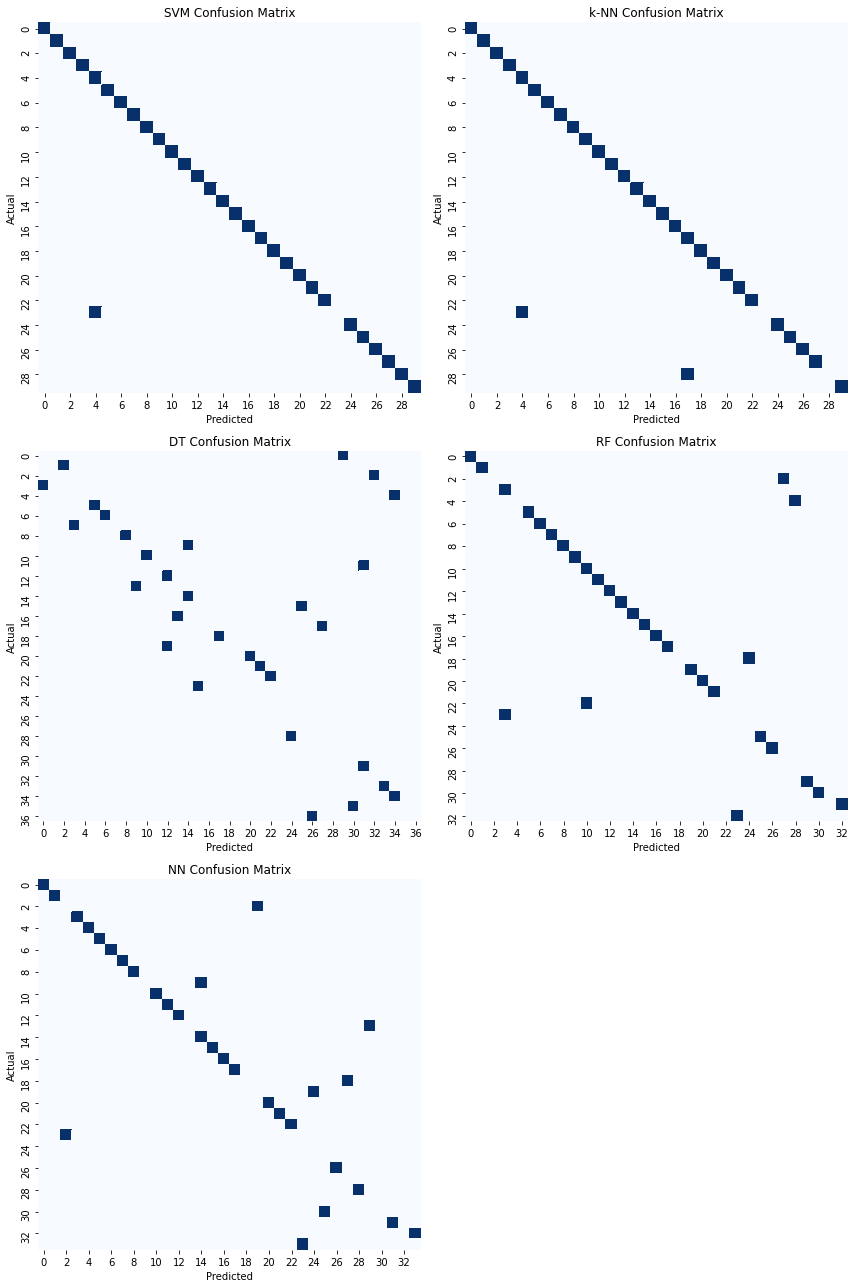

In [9]:
# Define the number of rows and columns for the subplot grid
num_models = len(confusion_matrices)
num_rows = (num_models - 1) // 2 + 1
num_cols = min(num_models, 2)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Plot each confusion matrix
for i, (name, cm) in enumerate(confusion_matrices.items()):
    row = i // num_cols
    col = i % num_cols
    sns.heatmap(cm, annot=False, cmap='Blues', fmt='g', cbar=False, ax=axes[row, col])
    axes[row, col].set_title(f'{name} Confusion Matrix')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

# Hide empty subplots if any
for i in range(len(confusion_matrices), num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('confution_matrix.png')
plt.show()

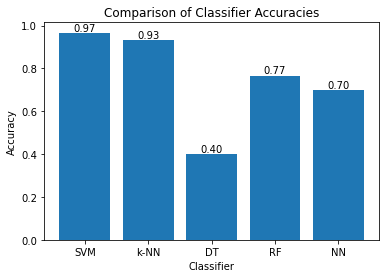

In [8]:
# Plot and save accuracy comparison with annotation
plt.figure()
bars = plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
plt.savefig('classifier_accuracies.png')
plt.show()